In [155]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Mall_customers.csv") # importing the dataset

## Exploratory data analysis

Checking the head of the data.

In [156]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Checking the shape of the dataset.

In [157]:
print("Dataset shape:", data.shape)

Dataset shape: (200, 5)


Checking for NULL data in the dataset


In [158]:
data.isnull().any().any()

False

In [159]:
print('NUMERICAL ATTRIBUTE STATISTIC:\n', data.describe())

NUMERICAL ATTRIBUTE STATISTIC:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Analyse Heat Map


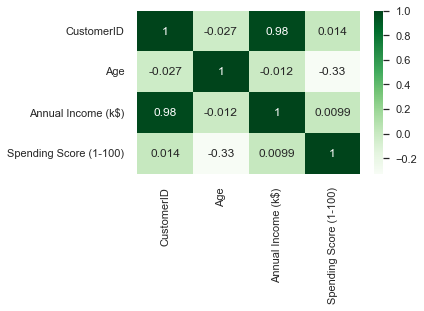

In [160]:
import seaborn as sns
print("Analyse Heat Map")
sns.heatmap(data.corr(), annot = True, cmap = 'Greens')
plt.show()

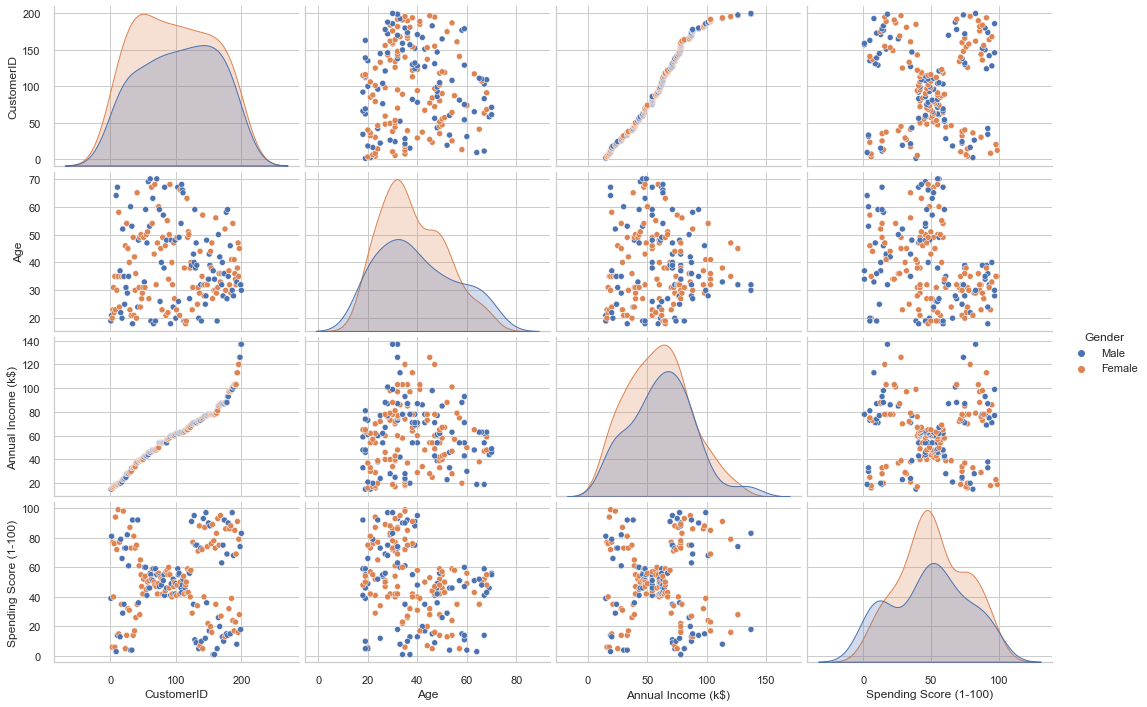

In [161]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="Gender",  aspect=1.5);
plt.show()

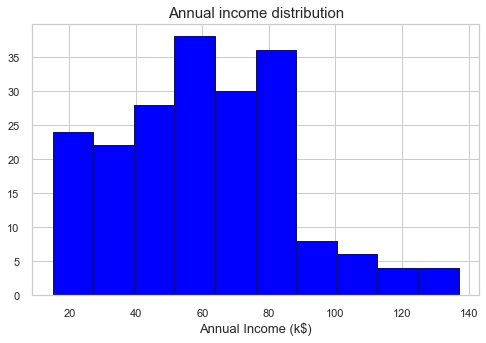

In [162]:
plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=15)
plt.xlabel ("Annual Income (k$)",fontsize=13)
plt.grid(True)
plt.hist(data['Annual Income (k$)'],color='blue',edgecolor='k')
plt.show()

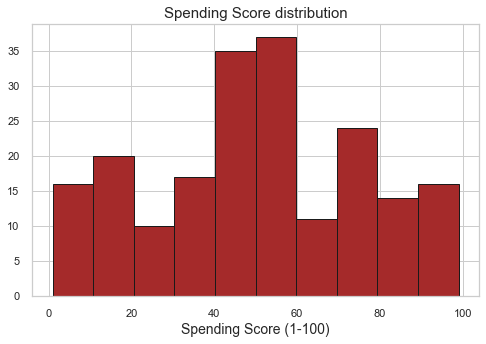

In [163]:
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution",fontsize=15)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(data['Spending Score (1-100)'],color='brown',edgecolor='k')
plt.show()

<AxesSubplot:>

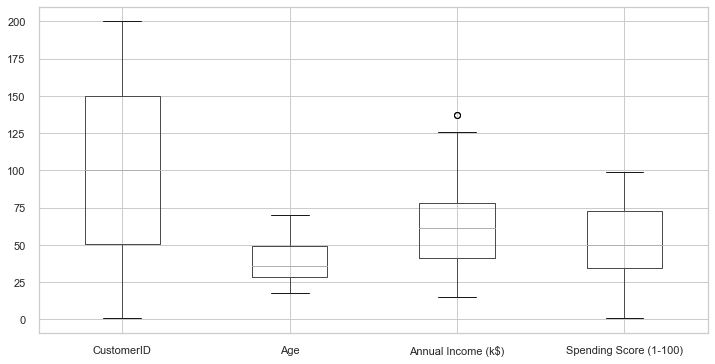

In [164]:
data.boxplot(figsize =(12,6))

###  Principal Component Analysis - There are varying reasons for using a dimensionality reduction step such as PCA prior to data segmentation. </br> * By reducing the number of features, we’re improving the performance of our algorithm.</br> * Another use of PCA is to compress the data and hence save the computational time. </br> * On top of that, by decreasing the number of features the noise is also reduced. 

In [62]:
data.drop(['Gender'],axis=1,inplace=True)

In [63]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(data), columns=data.columns)

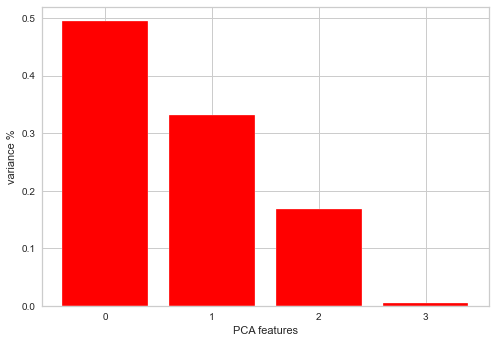

In [64]:
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA()
principalComponents = pca.fit_transform(df_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [65]:
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_std)

[0.49477783 0.82622127 0.99441362 1.        ]


Text(0, 0.5, 'cumulative explained variance')

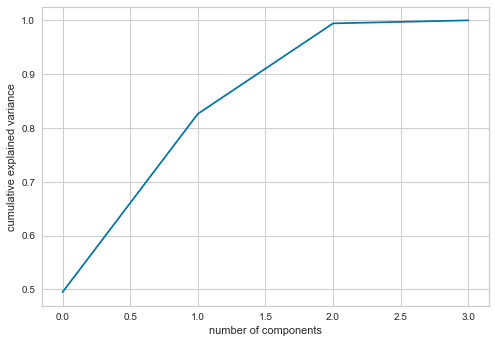

In [66]:
print(np.cumsum((pca.explained_variance_ratio_))) 
plt.plot(np.cumsum((pca.explained_variance_ratio_)))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 90 % of the variance. So, in this instance, we decide to<b> keep 3 components.

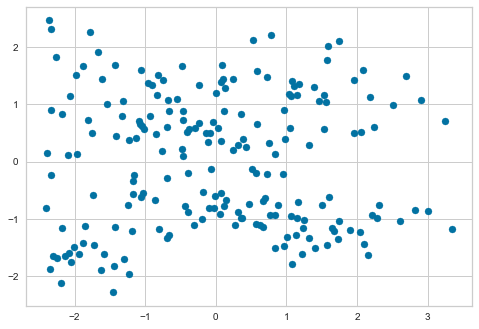

In [67]:
plt.scatter(df_pca[:,0],df_pca[:,1])

In [68]:
pca.explained_variance_ratio_

array([0.49477783, 0.33144344, 0.16819235, 0.00558638])

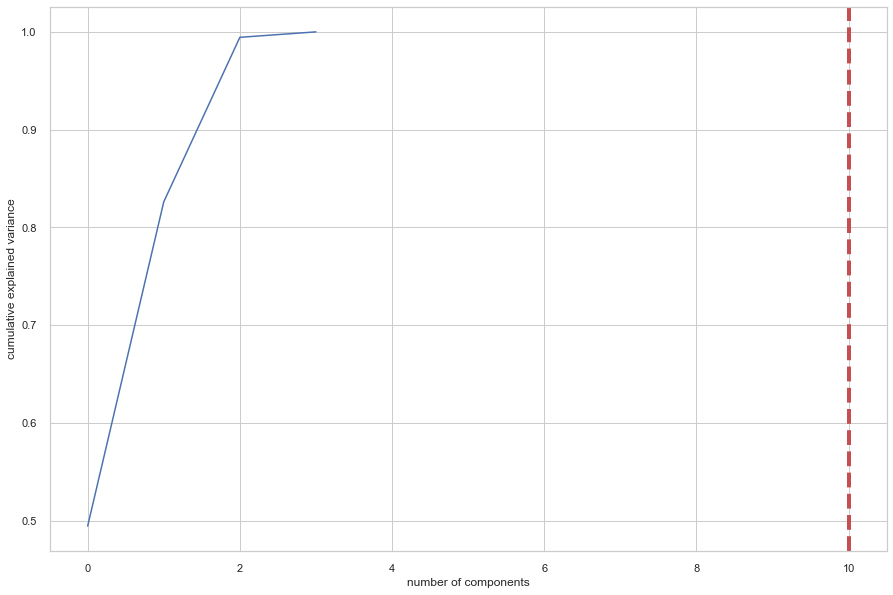

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.494778,0.494778
1,0.826221,0.331443
2,0.994414,0.168192
3,1.000000,0.005586


In [69]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

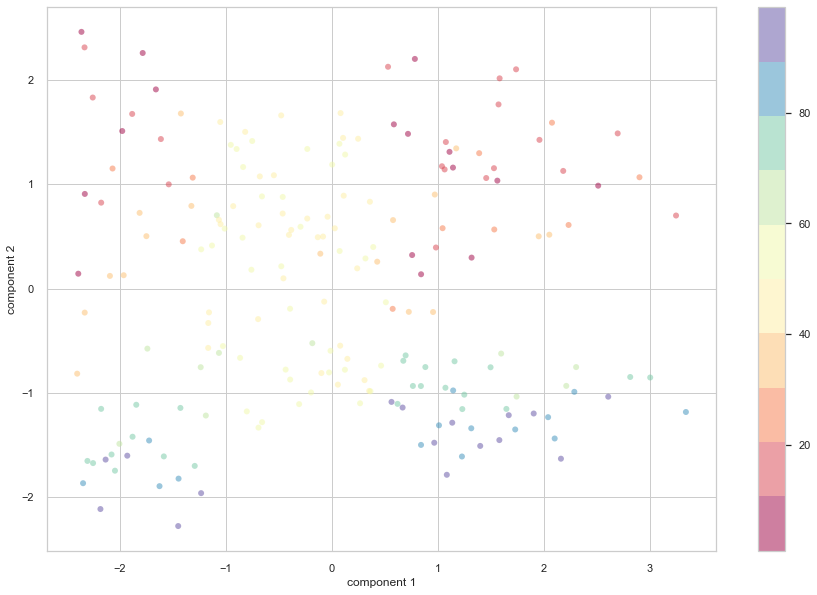

In [70]:
plt.figure(figsize=(15,10))
plt.scatter(df_pca[:, 0], df_pca[:, 1],
            c=data['Spending Score (1-100)'],edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

The X-axis here is our ‘Component 2’. The y-axis, on the other hand, is the first ‘Component 1’.
</br>
</br>We can now observe the separate clusters.

In [71]:
print("PCA shape:",df_pca.shape)
print("Dataset shape:", data.shape)
print(np.cumsum((pca.explained_variance_ratio_)))

PCA shape: (200, 4)
Dataset shape: (200, 4)
[0.49477783 0.82622127 0.99441362 1.        ]


#### Dropping non numeric column - CustomerID - we see that  it has no direct relation to segmenting customers. That's why we can drop it and move on with other features.

In [72]:
df= data
data.drop(['CustomerID'], axis=1, inplace=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Outlier Detection
Plotting Box Graphs


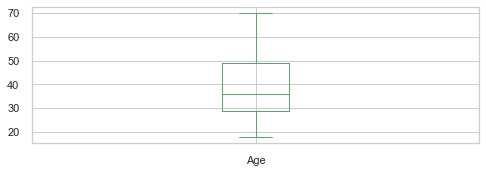

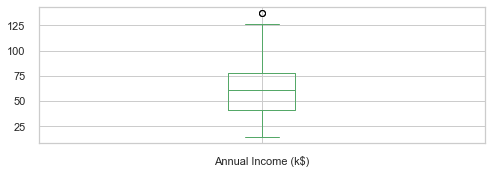

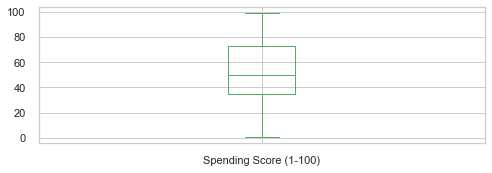

In [73]:
print("Outlier Detection")

print("Plotting Box Graphs")
for i in data.columns:
    plt.subplot(2,1,1)
    data[i].plot(kind = 'box', color='g')
    plt.show()

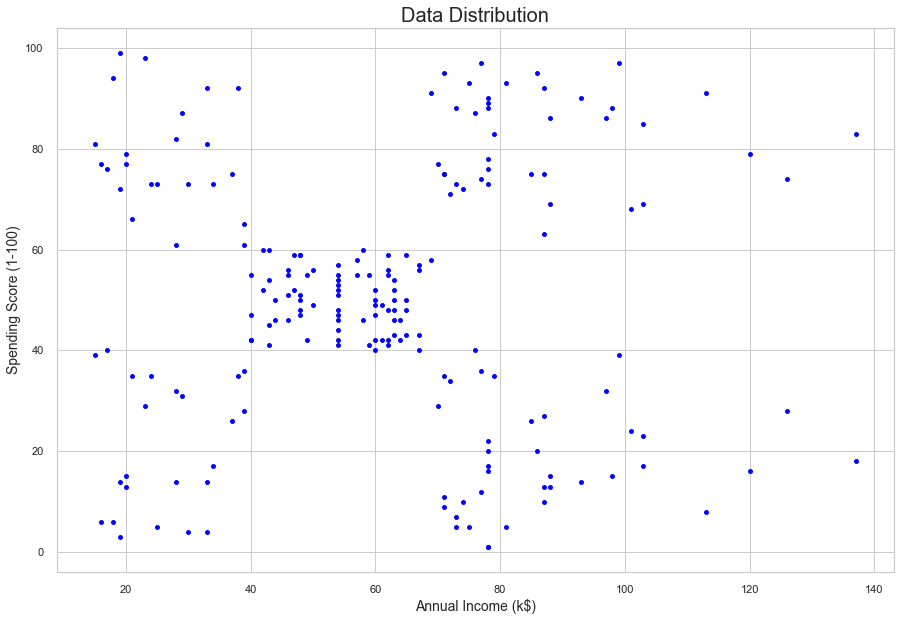

In [74]:
plt.figure(figsize=(15,10))
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],s=15,color='blue')
plt.title('Data Distribution',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.show()

In [75]:
print("WCSS or Within-Cluster-Sum of Squared Errors is calculated by the inertia_ attribute of KMeans function")

WCSS or Within-Cluster-Sum of Squared Errors is calculated by the inertia_ attribute of KMeans function


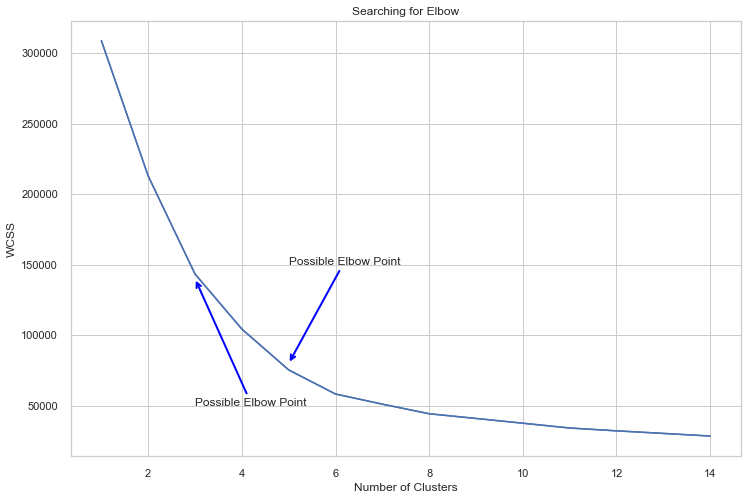

In [76]:
from sklearn.cluster import KMeans

clusters = []
K = range(1,15)
for i in K:
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)   #inertia = within-cluster sum-of-squares
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(K), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('WCSS')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.plot(K, clusters, 'bx-')
plt.show()

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

In [77]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## KMeans Clustering 

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = range(2,21)
for i in K:
    km = KMeans(n_clusters=i).fit(data)
    score = silhouette_score(data, km.labels_, metric='euclidean')
    print("For K value:{0}, silhouette_score:{1}".format(i,score))

For K value:2, silhouette_score:0.293166070535953
For K value:3, silhouette_score:0.3839349967742105
For K value:4, silhouette_score:0.40546302077733304
For K value:5, silhouette_score:0.44446409171786105
For K value:6, silhouette_score:0.4523443947724053
For K value:7, silhouette_score:0.43978902692261157
For K value:8, silhouette_score:0.42627498428462474
For K value:9, silhouette_score:0.4127131168384034
For K value:10, silhouette_score:0.38538171879214417
For K value:11, silhouette_score:0.3754243068179521
For K value:12, silhouette_score:0.3472221369132771
For K value:13, silhouette_score:0.34284225800723517
For K value:14, silhouette_score:0.35377591368516675
For K value:15, silhouette_score:0.3510306694544154
For K value:16, silhouette_score:0.3291081593961414
For K value:17, silhouette_score:0.33652056130486613
For K value:18, silhouette_score:0.3267451684037608
For K value:19, silhouette_score:0.32323081601166836
For K value:20, silhouette_score:0.3264350045849784


####                       Creating the Visual Plots

In [79]:
km3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = km3.fit_predict(data)

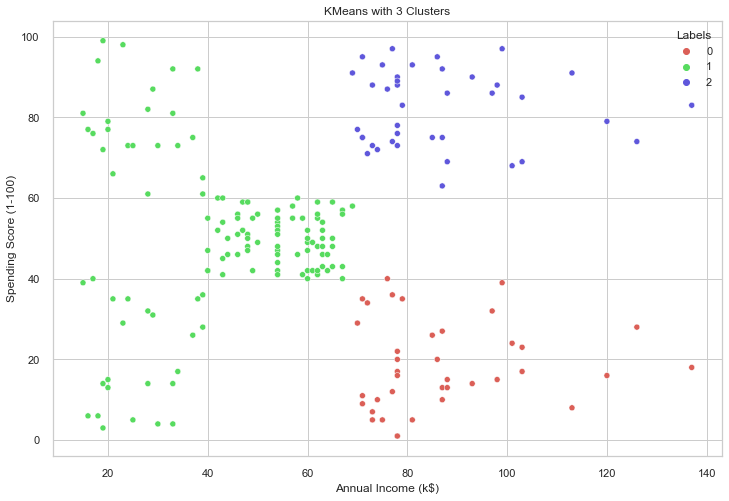

In [80]:
# 3 cluster

data['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

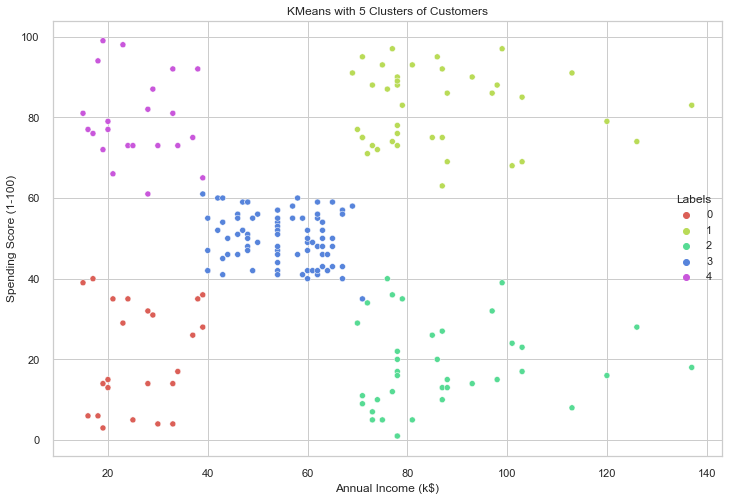

In [81]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = km5.fit_predict(data)


data['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters of Customers')
plt.show()

By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.




We can analyze our 5 clusters in detail now:

1. Customers with Label 0 is low income and low spending<br />
2. Customers with Label 1 is high income and high spending<br />
3. Customers with Label 2 is mid income and mid spending<br />
4. Customers with Label 3 is high income and low spending<br />
5. Customers with Label 4 is low income and high spending<br />

Also let's see them more clearly with boxplot:

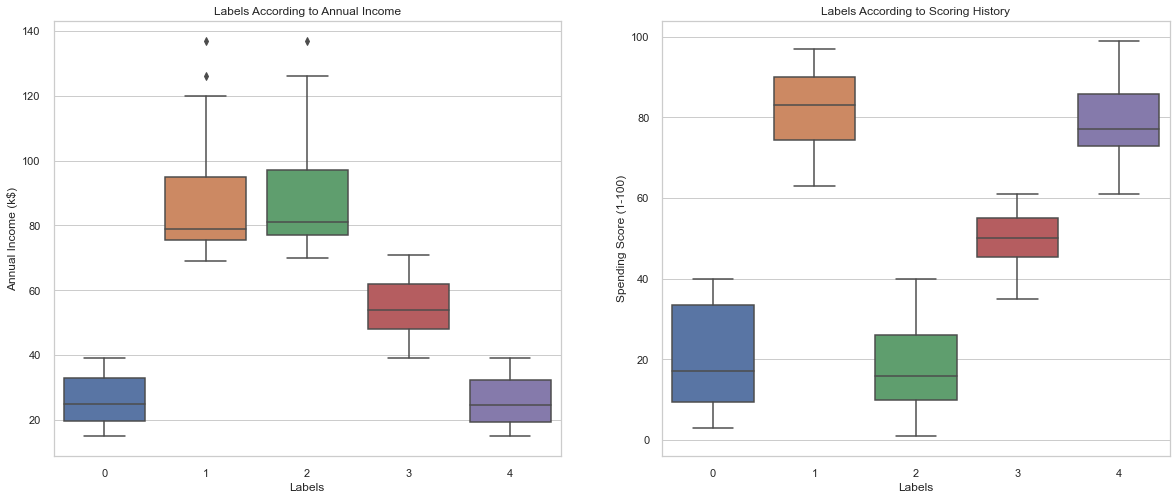

In [82]:
df=data
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.boxplot(x='Labels', y='Annual Income (k$)', data=df, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.boxplot(x='Labels', y='Spending Score (1-100)', data=df, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

In [83]:
df = pd.read_csv("Mall_customers.csv")
X=  df.iloc[:, [3, 4]].values


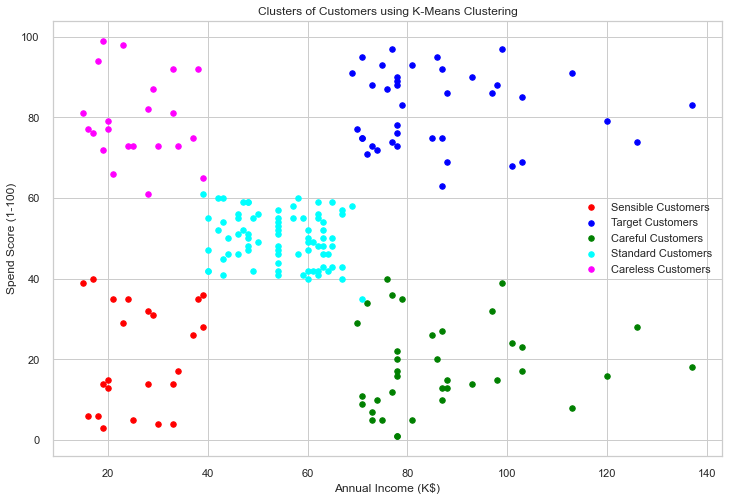

In [84]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Target Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Careless Customers')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

The name of clusters is given based on their income and spending.</br> * For example, when referring to a customer with low income and high spending, we have used cyan colour. This group indicates ‘Careless Customer’ since despite having a low income, they spend more.</br> * To sell a luxurious product, a person with high income and high spending habits should be targeted. This group of customers is represented in magenta colour in the above diagram.
We can analyze our 5 clusters in detail now:

1. Customers with Label "Sensible Customers" in Red are low income and low spending<br />
2. Customers with Label "Target Customers" in Blue are high income and high spending<br />
3. Customers with Label "Standard Customers" in Cyan are mid income and mid spending<br />
4. Customers with Label "Careful Customers" in Green are high income and low spending<br />
5. Customers with Label "Careless Customers" in Magenta are low income and high spending<br />

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.552


### For KMeans with 5 clusters the Silhouetter Score is 0.552

In [86]:

from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(data), columns=data.columns)


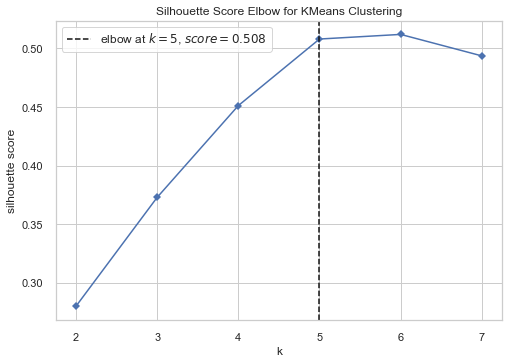

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [87]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123) 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(df_std)    
visualizer.poof()

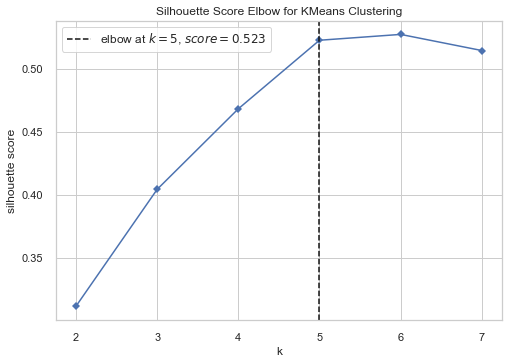

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [88]:
from sklearn.cluster import KMeans
data_x = data.iloc[:, 3:5]
data_x.head()
x_array =  np.array(data)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)


from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123) 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(x_scaled)    
visualizer.poof()

In [89]:

# Calculate Silhoutte Score that is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.
#
score = silhouette_score(x_scaled, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.459


### Silhouette Score: 0.552 through K-Means for 5 clusters

In [90]:
df_std.head()

,Age,Annual Income (k$),Spending Score (1-100),Labels
0,-1.424569,-1.738999,-0.434801,-1.816255
1,-1.281035,-1.738999,1.195704,1.501106
2,-1.352802,-1.700830,-1.715913,-1.816255
3,-1.137502,-1.700830,1.040418,1.501106
4,-0.563369,-1.662660,-0.395980,-1.816255


Text(0.5, 1.0, 'PCA Clustering')

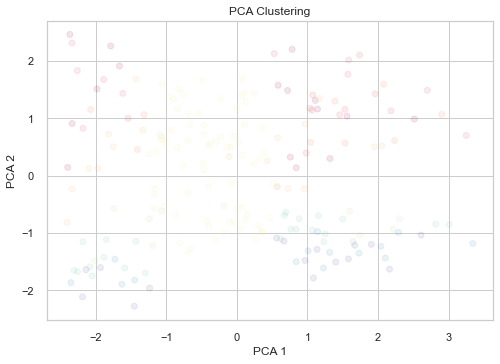

In [91]:
plt.scatter(PCA_components[0], PCA_components[1],c=data['Spending Score (1-100)'], alpha=.1,cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Clustering')


In [93]:
pca.explained_variance_ratio_

array([0.49477783, 0.33144344, 0.16819235, 0.00558638])

### K Means using PCA - 

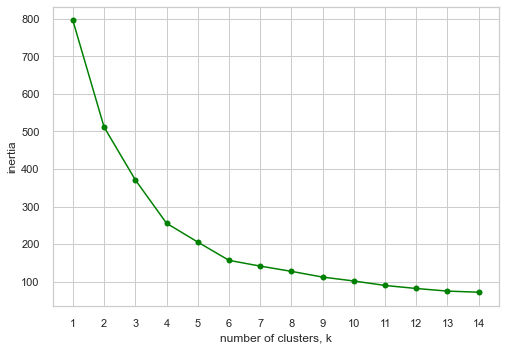

In [92]:
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='green')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Compute data proximity from each other using Nearest Neighbours

In [102]:
from sklearn.neighbors import NearestNeighbors # importing the library

x=  df_std.iloc[:, [1, 2]].values
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours


Sorting and plot the distances between the data points

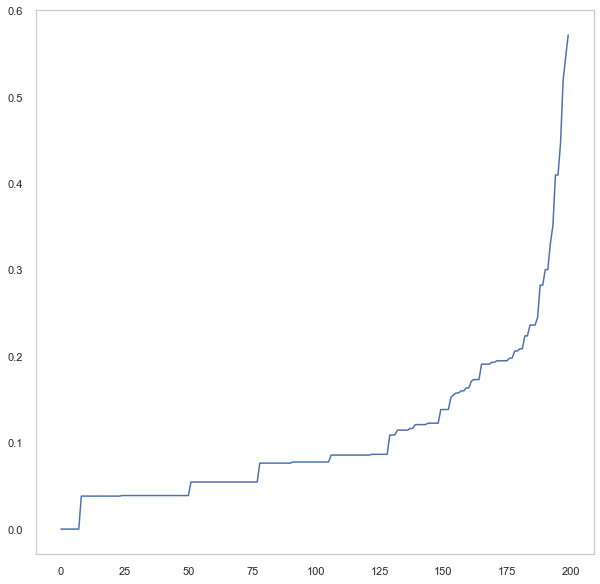

In [103]:
plt.figure(figsize=(10,10))
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.grid()
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

### From the above plot, we note the maximum curvature of the curve is about 0.3 which can be used to set eps initially.

## Hierarchical clustering

### Now the same task will be implemented using Hierarchical clustering. The reading of CSV files and creating a dataset for algorithms will be common as given in the first and second step. In K-Means, the number of optimal clusters was found using the elbow method. In hierarchical clustering, the dendrograms are used for this purpose. 

In [104]:
data = pd.read_csv("Mall_customers.csv")


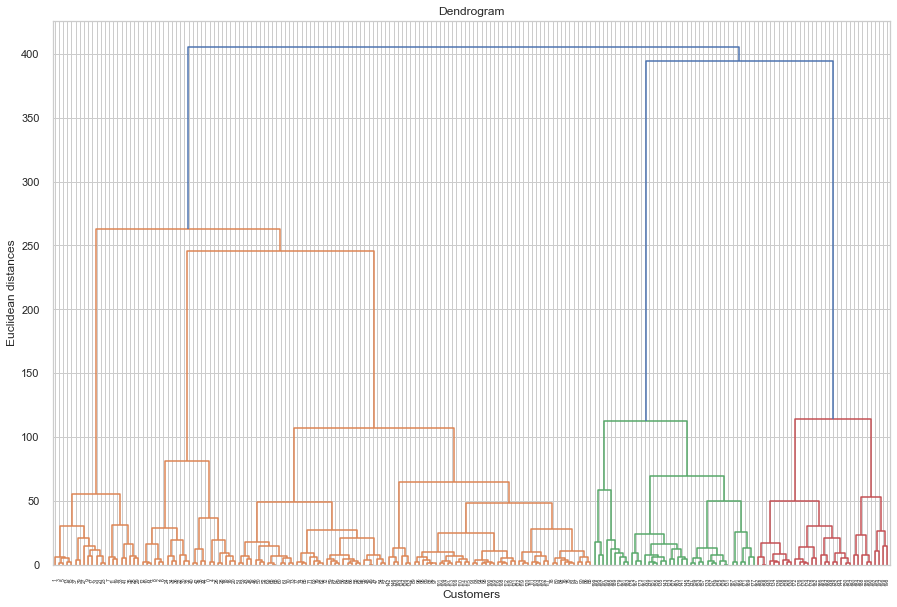

In [182]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
# extracting the above mentioned columns
x = data.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The combination of 5 lines are not joined on the Y-axis from 100 to 240, for about 140 units. So, the optimal number of clusters will be 5 for hierarchical clustering. 

Now we train the hierarchical clustering algorithm and predict the cluster for each data point.

In [106]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

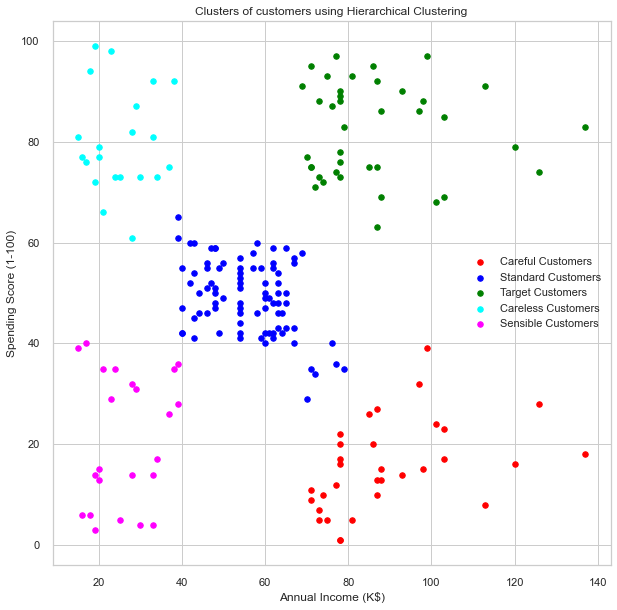

In [107]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 30, c = 'red', label = 'Careful Customers')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 30, c = 'blue', label = 'Standard Customers')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 30, c = 'green', label = 'Target Customers')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 30, c = 'cyan', label = 'Careless Customers')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 30, c = 'magenta', label = 'Sensible Customers')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [108]:
#Shape of subset For Clustering

In [109]:
print(x.shape)

(200, 2)


### Hierarchical Clustering on Principal Components

In [183]:
import scipy.cluster.hierarchy as hc

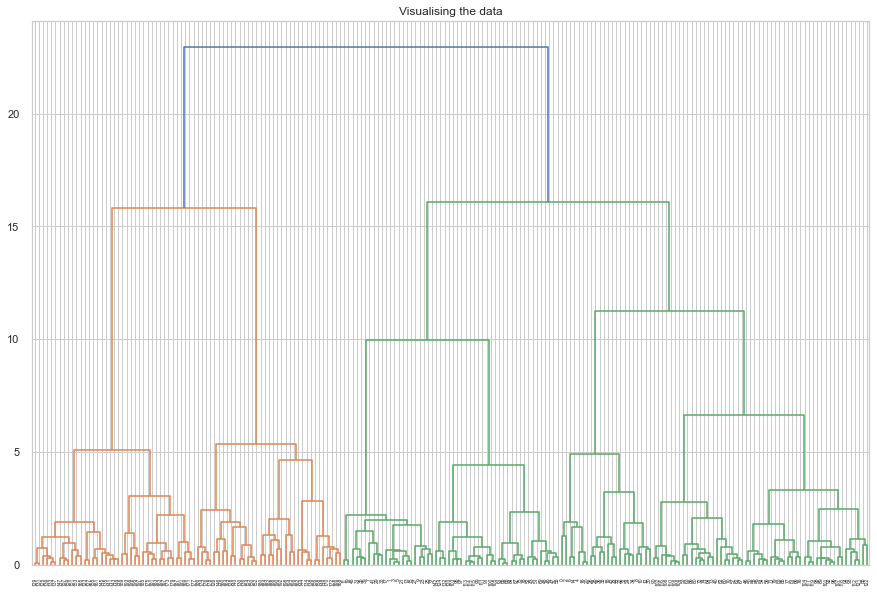

In [184]:
plt.figure(figsize =(15, 10))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))

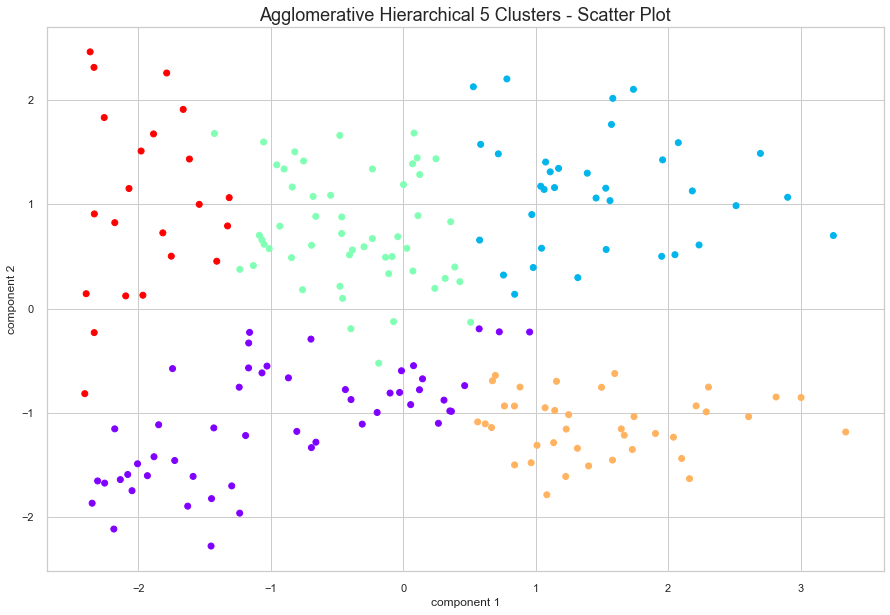

In [189]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(15, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 5 Clusters - Scatter Plot", fontsize=18)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

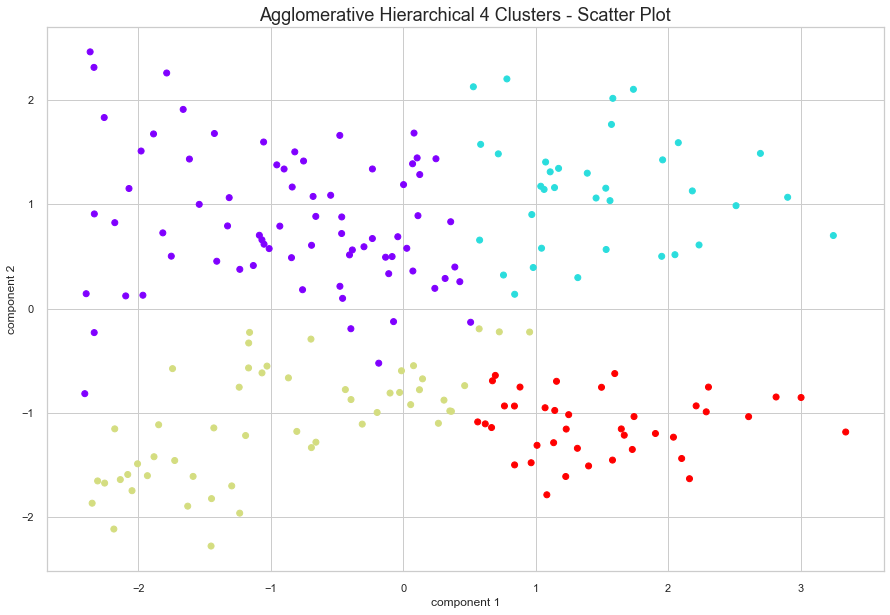

In [190]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(15, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 4 Clusters - Scatter Plot", fontsize=18)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

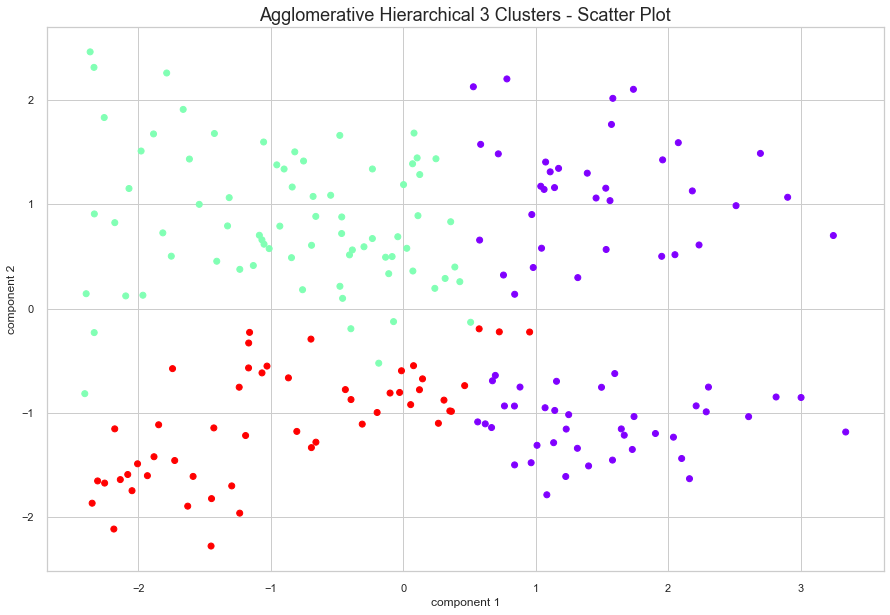

In [191]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(15, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 3 Clusters - Scatter Plot", fontsize=18)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

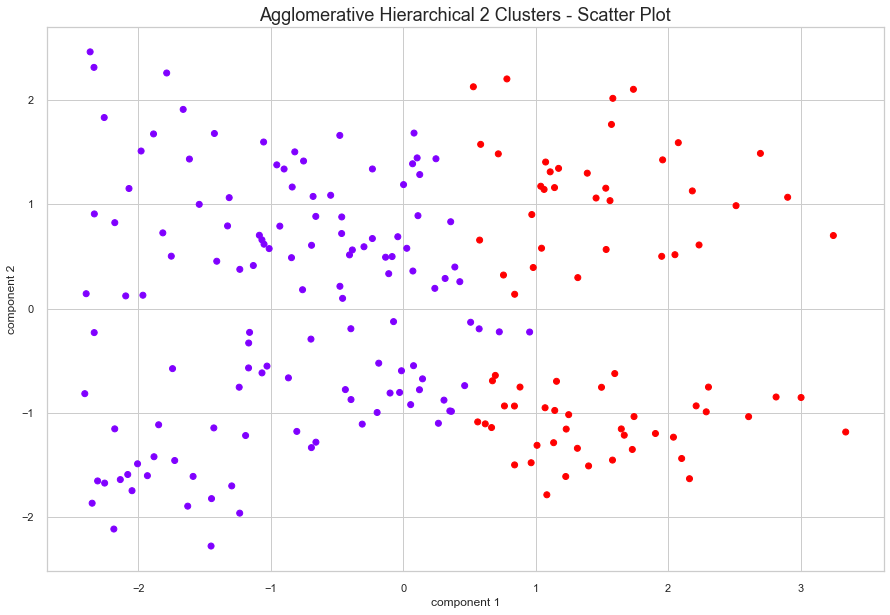

In [192]:
#
# Create the clusters using Agglomerative hierarchical clustering
#
agc = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(15, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical 2 Clusters - Scatter Plot", fontsize=18)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

### DBSCAN CLUSTERING

###  The above output means there are no missing values in our dataset. Since our data is ready to use, let us extract Income and the SpendingScore columns and apply our DBSCAN model to them.

Before we apply the DBSCAN model, first, we need to obtain its two parameters.

MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:
If the dataset has two dimensions, use the min sample per cluster as 4.
If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension.

Since our data is two-dimensional, we shall use the default value of 4 as our MinPoint parameter.

Epsilon (Eps): To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.

#### We now have our two parameters as:

MinPoints = 10
Eps = 0.3


#### Now that we have the parameters let us implement the DBSCAN model.

In [126]:
from sklearn.cluster import DBSCAN
# extracting the above mentioned columns
x = df_std.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values

# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.3, min_samples = 10).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

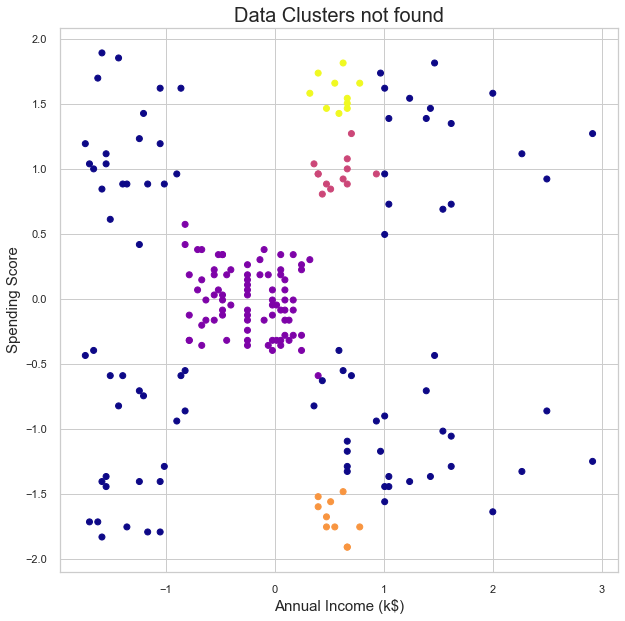

In [127]:
# Plot the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Annual Income (k$)",fontsize=15) # X-axis label
plt.ylabel("Spending Score",fontsize=15) # Y-axis label
plt.title('Data Clusters not found',fontsize=20)
plt.show() # showing the plot





There are SOME points in dark color shown which we can consider as outliers , with eps 0.3 there is no clear clustering

In [128]:
score = silhouette_score(x, labels)
#
# Print the score
#
print('silhouette  Score: %.3f' % score)

silhouette  Score: 0.141


### Changing eps from 0.3 to 0.4  and min_points 10, increased the number of clusters 

In [133]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.4, min_samples = 10).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

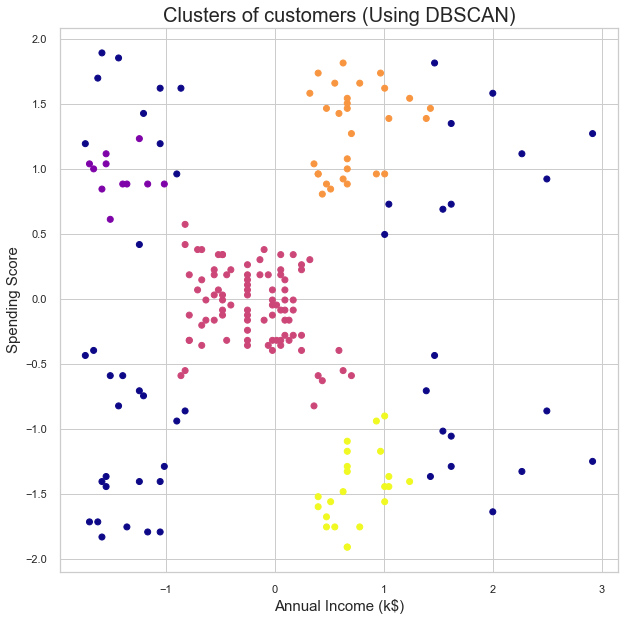

In [134]:
# Plot the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Annual Income (k$)",fontsize=15) # X-axis label
plt.ylabel("Spending Score",fontsize=15) # Y-axis label
plt.title('Clusters of customers (Using DBSCAN)',fontsize=20)
plt.show() # showing the plot

In [135]:
score = silhouette_score(x, labels)
#
# Print the score
#
print('Silhouette  Score: %.3f' % score)

Silhouette  Score: 0.325


### Silhouette  Score: 0.325 is below average

### Changing eps from 0.4 to 0.5  and no change in min points

In [143]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.5, min_samples = 10).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

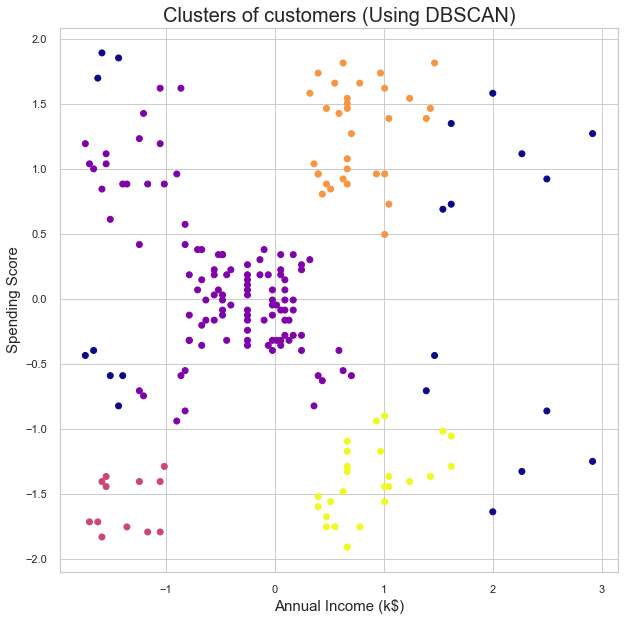

In [144]:
# Plot the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Annual Income (k$)",fontsize=15) # X-axis label
plt.ylabel("Spending Score",fontsize=15) # Y-axis label
plt.title('Clusters of customers (Using DBSCAN)',fontsize=20)
plt.show() # showing the plot

In [145]:
score = silhouette_score(x, labels)
#
# Print the score### Changing eps from 0.4 to 0.3  and min_points from 20 to 10, increased the number of clusters from 4 to 5
#
print('Silhouette  Score: %.3f' % score)

Silhouette  Score: 0.406


### Silhouette  Score: 0.406 is still below average

### Check outliers :-

In [146]:
print (df_std[labels == -1])

          Age  Annual Income (k$)  Spending Score (1-100)    Labels
0   -1.424569           -1.738999               -0.434801 -1.816255
4   -0.563369           -1.662660               -0.395980 -1.816255
7   -1.137502           -1.624491                1.700384  1.501106
11  -0.276302           -1.586321                1.894492  1.501106
16  -0.276302           -1.509983               -0.590088 -1.816255
18   0.943732           -1.433644               -0.823017 -1.816255
19  -0.276302           -1.433644                1.855671  1.501106
20  -0.276302           -1.395474               -0.590088 -1.816255
180 -0.132768            1.390894               -0.706552 -0.157575
184  0.154298            1.467233               -0.434801 -0.157575
187 -0.778669            1.543572                0.691024 -0.986915
189 -0.204535            1.619911                1.350990 -0.986915
191 -0.491602            1.619911                0.729845 -0.986915
192 -0.419835            2.001605               

### Changing eps from 0.4 to 0.5  and min_points from 20 to 10, increased the number of clusters from 4 to 5 but Silhouette Score changes from 0.325 to 0.406

## Comparing All silhouette scores for different values of eps and min_samples final decision is for having 4 clusters where we can see clear partition 

In [147]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_

4

In [148]:
df_std['DBSCAN_customer_labels']=labels
df_std['DBSCAN_customer_labels'].value_counts()


 0    109
 2     32
 3     26
-1     21
 1     12
Name: DBSCAN_customer_labels, dtype: int64

In [149]:
df_std['Clus_Db']=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
# A sample of clusters
print(df_std[['Annual Income (k$)','Spending Score (1-100)']].head())
# Number of Labels
print("Number of Clusters: ", set(labels))


   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980
Number of Clusters:  {0, 1, 2, 3, -1}


In [150]:
for clust_number in set(labels):
    clust_set = df_std[df_std.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Income: '+ str(round(np.mean(clust_set['Annual Income (k$)'])))+\
               ', Avg Spending Score: '+ str(round(np.mean(clust_set['Spending Score (1-100)'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Income: 0, Avg Spending Score: 0, Count: 109
Cluster 1, Avg Income: -1, Avg Spending Score: -2, Count: 12
Cluster 2, Avg Income: 1, Avg Spending Score: 1, Count: 32
Cluster 3, Avg Income: 1, Avg Spending Score: -1, Count: 26


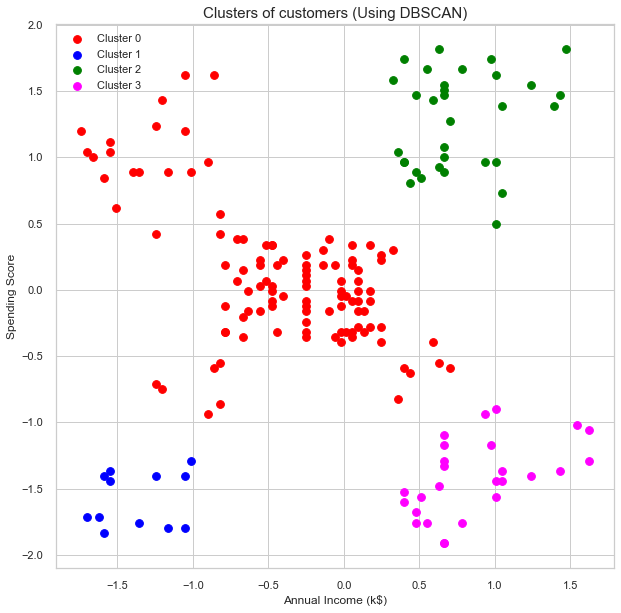

In [151]:
plt.figure(figsize=(10,10))
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 60, c = 'red', label = 'Cluster 0')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 60, c = 'blue', label = 'Cluster 1')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 60, c = 'green', label = 'Cluster 2')
plt.scatter(x[labels == 3, 0], x[labels == 3, 1], s = 60, c = 'magenta', label = 'Cluster 3')
#plt.scatter(x[labels == 4, 0], x[labels == 4, 1], s = 60, c = 'yellow', label = 'Cluster 4') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score') 
plt.legend() 
plt.title('Clusters of customers (Using DBSCAN)',fontsize=15)
plt.show()

## Inferences -

We can analyze our 5 clusters in detail now:

1. Customers with Label "1" are "Sensible Customers" in Blue are low income and low spending<br />
2. Customers with Label "2" are "Target Customers" in Green are high income and high spending<br />
3. Customers with Label "0" are "Standard Customers" in Red are mid income and mid spending<br />
4. Customers with Label "3" are "Careful Customers" in Magenta are high income and low spending<br />
5. Some Customers with Label "0" are "Careless Customers" in Red (high spending score) are low income and high spending<br />

### Using DBSCAN to Cluster the Principal Components 

In [177]:
dbs = DBSCAN(eps=0.5,
             min_samples=10)

y_dbs = dbs.fit_predict(df_pca)

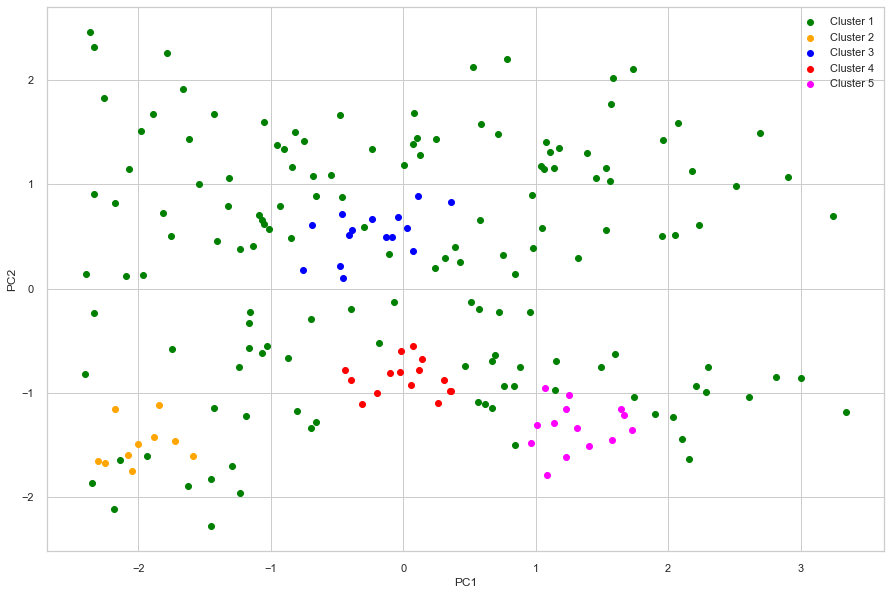

In [180]:
plt.figure(figsize=(15,10))
plt.scatter(df_pca[y_dbs==-1, 0],
           df_pca[y_dbs==-1, 1],
           c='green',
           label='Cluster 1')
plt.scatter(df_pca[y_dbs==0, 0],
           df_pca[y_dbs==0, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(df_pca[y_dbs==1, 0],
           df_pca[y_dbs==1, 1],
           c='blue',
           label='Cluster 3')
plt.scatter(df_pca[y_dbs==2, 0],
           df_pca[y_dbs==2, 1],
           c='red',
           label='Cluster 4')
plt.scatter(df_pca[y_dbs==3, 0],
           df_pca[y_dbs==3, 1],
           c='magenta',
           label='Cluster 5')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Above dataset looks very noisy and there isn’t a clear demarkation betweeen clusters to really get the separation we were looking for.

END